# <span style="color:blue"> Numerical Simulation Laboratory (NSL) </span>
    
##  <span style="color:blue"> Edoardo Baraldi - Notebook 1 </span>   


### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font>Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

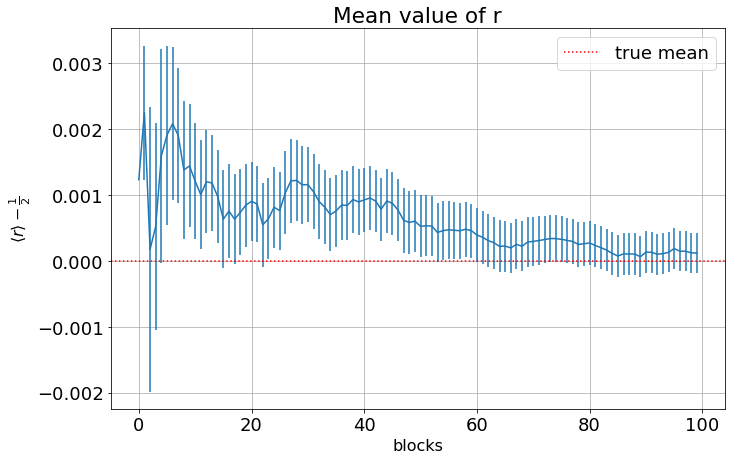

In [9]:
import numpy as np
import matplotlib.pyplot as plt 

media, varianza =np.loadtxt("Data1_1", unpack =True, usecols=(0,1), delimiter=",")

M=1000000   #number of total throws
N=100       #nuber of blocks
L=int(M/N)  #number of throws in each block

x=np.arange(N)

plt.rcParams.update({'font.size': 18})
plt.rcParams["figure.figsize"]= (11,7)
plt.errorbar(x, media-0.5, yerr=varianza)
plt.xlabel("blocks", fontsize=16)
plt.ylabel(r'$\langle r \rangle - \frac{1}{2}$', fontsize=16)
plt.axhline(y=0., linestyle='dotted', label='true mean', color='r')
plt.legend()
plt.grid(True)
plt.title('Mean value of r')
plt.show()

Il generatore di numeri pseduo-casuali utilizzato per determinare il valore dell' integrale $\int_0^1 r dr$ sembra funzionare correttamente. Il numero di estrazioni dal generatore è stato impostato a $10^6$, il numero di blocchi a $100$ e conseguentemente il numero di estrazioni per blocco a $10^4$. Guardando i risultati dell' integrale per un numero di blocchi superiore a 80 è visibile una saturazione dei valori stessi intorno a $1/2$ e degli errori ad essi collegati, calcolati tramite media a blocchi. Gli errori statistici rendono inoltre compatibile il risultati ottenuti con quello attesso.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font>Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

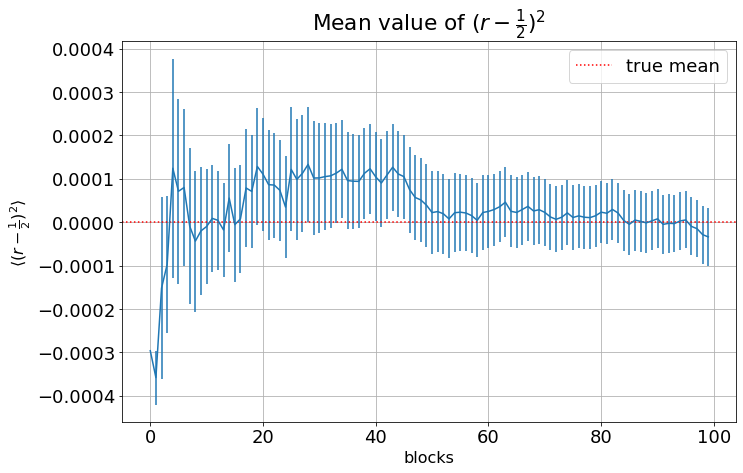

In [8]:
media, varianza =np.loadtxt("Data1_2", unpack =True, usecols=(0,1), delimiter=",")

x=np.arange(N)

plt.errorbar(x, media-1/12, yerr=varianza)
plt.xlabel("blocks", fontsize=16)
plt.ylabel(r'$\langle (r - \frac{1}{2})^2\rangle $', fontsize=16)
plt.axhline(y=0., linestyle='dotted', label='true mean', color='r')
plt.legend()
plt.grid(True)
plt.title(r'Mean value of $(r-\frac{1}{2})^2$')
plt.show()

Anche in questo è possibile notare la bontà del generatore di numeri pseudo-casuali nel determinare correttamente il risultato dell' integrale $\int_0^1 (r-1/2)^2 dr = 1/12$. Si assiste, come nel caso precedente, a una saturazione dei valori dell'integrale per un elevato numero di blocchi verso il valore ideale. Le incertezze statistiche rendono i valori ottenuti compatibili con quello reale.

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

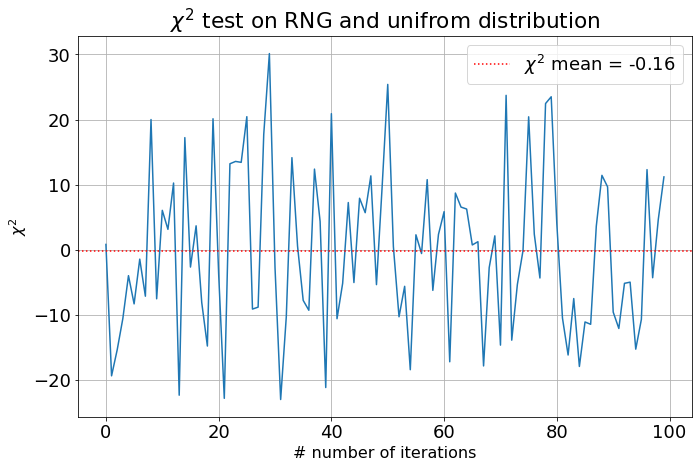

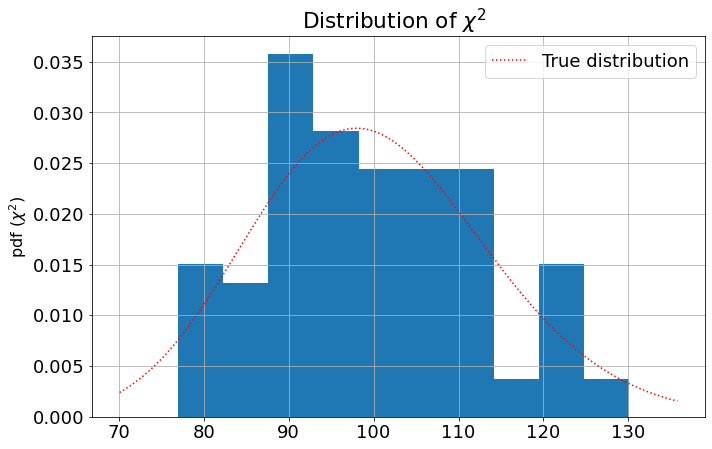

In [21]:
import scipy.stats as sp

chi_quadro=np.loadtxt("Data1_3", unpack =True)

Mchi=100
nchi=10000
Lchi=int(Mchi/nchi)
iterations=100

x=np.arange(iterations)

plt.plot(x, chi_quadro-100) 
plt.xlabel("# number of iterations", fontsize=16)
plt.ylabel(r'$\chi^2$', fontsize=16)
plt.axhline(y=np.mean(chi_quadro-100), linestyle='dotted', label='$\chi^2$ mean = -0.16', color='r')
plt.legend()
plt.grid(True)
plt.title(r'$\chi^2$ test on RNG and unifrom distribution' )
plt.show()

x_histo=np.linspace(sp.chi2.ppf(0.01, 100), sp.chi2.ppf(0.99, 100), 1000)
plt.hist(chi_quadro, density=True)
plt.plot(x_histo, sp.chi2.pdf(x_histo,100), color="red",linestyle='dotted', label='True distribution')
plt.ylabel(r'pdf ($\chi^2$)', fontsize=16)
plt.legend()
plt.grid(True)
plt.title(r'Distribution of $\chi^2$  ')
plt.show()


Il primo grafo mostra il valore $\chi^2$ al variare del numero di iterazioni già sottratto al valore ideale $\simeq 100$. Ogni valore è stato calcolato con $10^4$ estrazioni. E' possibile notare che le grandi fluttauzioni presenti sono intorno al valore medio, compatibile con quello reale. L' incertezza statistica è dell'ordine di $\sigma \simeq \sqrt{\langle X \rangle} \simeq 10$, perciò con essa si includono la maggior parte dei valori trovati. Un ulteriore conferma di questa affermazione è l'istogramma sottostante in cui la posizione del picco della distribuzione creata risulta qualitativamente compatibile con quella della distribuzione reale.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

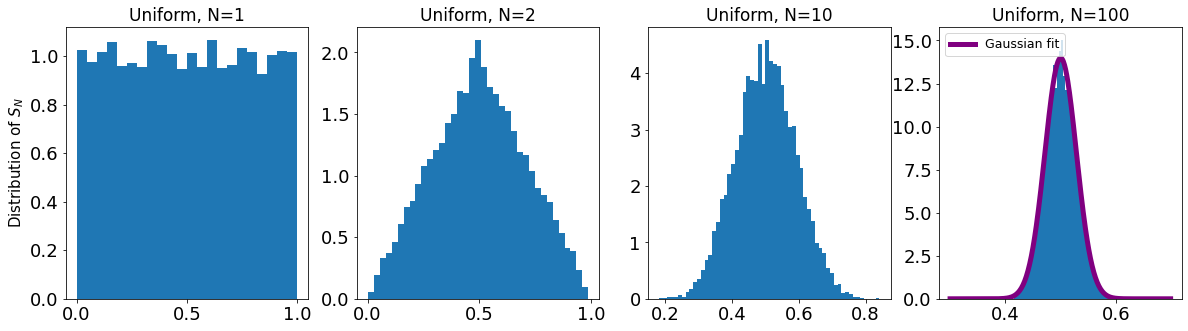

i parametri del fit sono:  0.5001043955   0.02852982634140418


In [16]:
import scipy.stats as sp

N1 = list({1, 2, 10, 100})
ran_data = {}
lor_data = {}
exp_data = {}

for i in range(len(N1)):
    filename = "Data2_" + str(N1[i])
    ran_data[i], exp_data[i], lor_data[i] = np.loadtxt(filename, unpack=True, usecols=(0, 1, 2), delimiter=",") ##load datas

fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize=(20,5))

ax0.hist(ran_data[0], bins= "auto", density=True)
ax1.hist(ran_data[1], bins= "auto", density=True)
ax2.hist(ran_data[2], bins= "auto", density=True)
ax3.hist(ran_data[3], bins= "auto", density=True)

mu, std= sp.norm.fit(ran_data[3])
x=np.arange(0.3, 0.7, 0.001)
ax3.plot(x,sp.norm.pdf(x,mu, std), label="Gaussian fit", linewidth=5, color='purple')

for i in range(4):
    globals()['ax'+str(i)].set_title(f"Uniform, N={N1[i]}", fontsize=17)

ax0.set_ylabel(fr"Distribution of $S_N$", fontsize=15)
plt.legend(loc="upper left", fontsize='x-small')
plt.show()

print("i parametri del fit sono: ",mu, " ", std)

Il numero di estrazioni totale è di $10^6$. 

Come previsto dal teorema del limite centrale la somma di variabili aleatorie distribuite uniformemente converge a una distribuzione gaussiana per un numero di blocchi tendente all'ifinito. Questo risulta già soddisfatto per $N = 100$.  

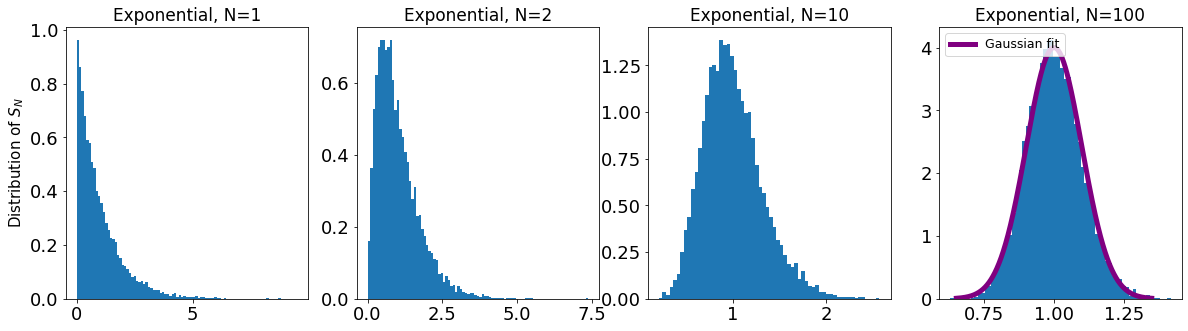

i parametri del fit sono:  1.0000905004   0.09973204753484309


In [17]:
fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize=(20,5))

ax0.hist(exp_data[0], bins= "auto", density=True)
ax1.hist(exp_data[1], bins= "auto", density=True)
ax2.hist(exp_data[2], bins= "auto", density=True)
ax3.hist(exp_data[3], bins= "auto", density=True)

mu, std= sp.norm.fit(exp_data[3])
x=np.linspace(0.65, 1.35,1000)
ax3.plot(x,sp.norm.pdf(x,mu, std), label="Gaussian fit", linewidth=5, color='purple')

for i in range(4):
    globals()['ax'+str(i)].set_title(f"Exponential, N={N1[i]}", fontsize=17)

ax0.set_ylabel(fr"Distribution of $S_N$", fontsize=15)
x = np.linspace(0.5, 1.5, 100)
plt.legend(loc="upper left", fontsize='x-small')
plt.show()

print("i parametri del fit sono: ",mu, " ", std)

Il numero di estrazioni totale è di $10^6$.

Analogamente al caso precedente, la somma di vairabili distribuitie esponenzialmente converge a una distribuzione gaussiana per un numero di blocchi tendente all'infintio. Anche qui il teorema risulta già soddisfatto per $N = 100$.

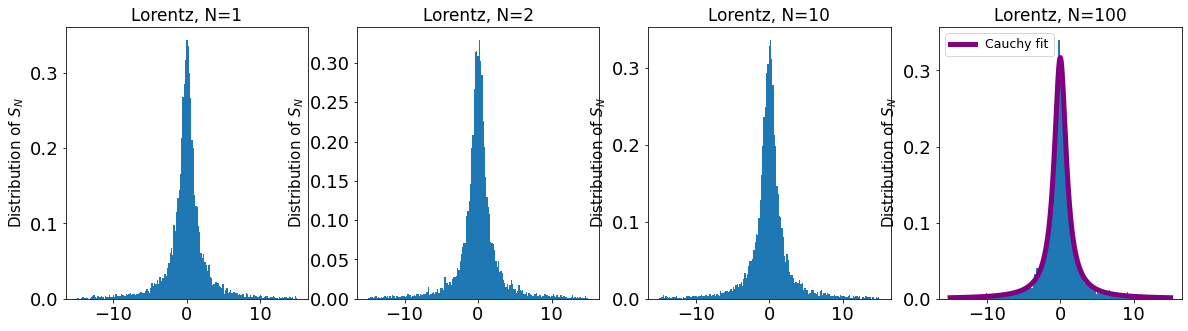

i parametri del fit sono:  -0.010155445369008923   1.0041842049789673


In [6]:
fig, [ax0, ax1, ax2, ax3] = plt.subplots(1,4, figsize=(20,5))

ax0.hist(lor_data[0], range=(-15,15),bins="auto", density=True)
ax1.hist(lor_data[1], range=(-15,15),bins= "auto", density=True)
ax2.hist(lor_data[2], range=(-15,15),bins= "auto", density=True)
ax3.hist(lor_data[3], range=(-15,15),bins= "auto", density=True)

mean, tau= sp.cauchy.fit(lor_data[3])
x=np.linspace(-15,15, 1000)
ax3.plot(x,sp.cauchy.pdf(x,mean, tau), label="Cauchy fit", linewidth=5, color='purple')

for i in range(4):
    globals()['ax'+str(i)].set_title(f"Lorentz, N={N1[i]}", fontsize=17)
    globals()['ax'+str(i)].set_ylabel(fr"Distribution of $S_N$", fontsize=15)

plt.legend(loc="upper left", fontsize='x-small')
plt.show()

print("i parametri del fit sono: ",mean, " ", tau)

Il numero di estrazioni totale è di $10^6$.

A differenza dei casi precedenti la distribuzione lorentziana ha un differente bacino di convergenza ed il teorema del limite centrale per variabili distribuite in modo lorentziano afferma che la convergenza è ad un'altra distribuzione lorentziana per un numero di blocchi tendente all'infinito. Nonostante questa differenza dai casi precedenti, il teorema viene verificato già per $N = 100$.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

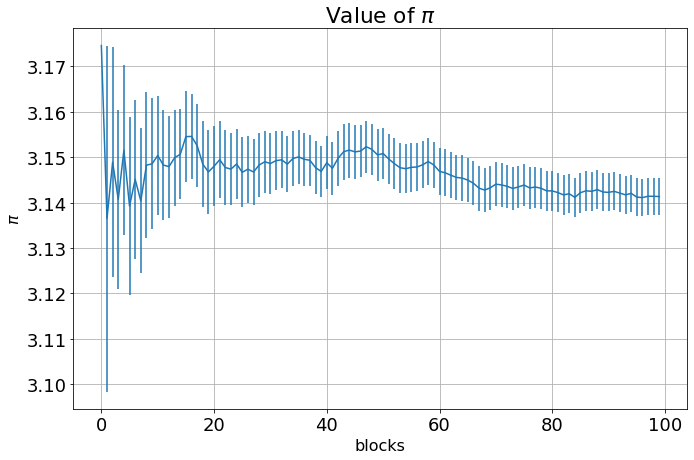

In [24]:
pi, var_pi =np.loadtxt("Data3", unpack =True, usecols=(0,1), delimiter=",")

x=np.arange(N)

plt.errorbar(x, pi, yerr=var_pi)
plt.xlabel("blocks", fontsize=16)
plt.ylabel(r'$\pi$', fontsize=16)
#plt.axhline(y=math.pi, linestyle='dotted', label='true mean', color='r')
#plt.legend()
plt.grid(True)
plt.title(r'Value of $\pi$')
plt.show()

Il numero di estrazioni è $10^6$ e il numero di blocchi è $100$.

La simulazione del esperimento di Buffon è stato eseguito prendendo un ago di lunghezza $L=1.2$ m e una distanza fra fra due successive righe orizzontali $d=2$ m. I lanci dell'ago sono stati ricreati generando un numero casuale da 0 a $d$, corrispondente all'ordinata della prima estremità e successivamente generando un punto all'interno di un cerchio di raggio 1. Dalle cordinate del punto nel cerchio è stato calcolato l'angolo $\theta=arcos(x_p/r_p)$. L'ordinata della seconda estremita diventa così: $y=y_0 +Lsin(\theta)$. La media a blocchi è stata così valutata dal numero normalizzato di volte in cui l'ago incrociava una delle righe. Anche qui, come nei casi precedenti, è possibile vedere che per numerosi blocchi il valor medio, con corrispondente incertezza statistica, è compatibile con il valore di $\pi$.